#  Standardized bar chart

## Setup


In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# Seaborn style
sns.set_theme(style="ticks")

# Custom colors
blue = "#3F83F4"
grey = "#9C9C9C"

## Data

In [2]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "loans.csv"

df = pd.read_csv(ROOT + DATA)

df.homeownership = df.homeownership.astype("category")
df.application_type = df.application_type.astype("category")

## Chart

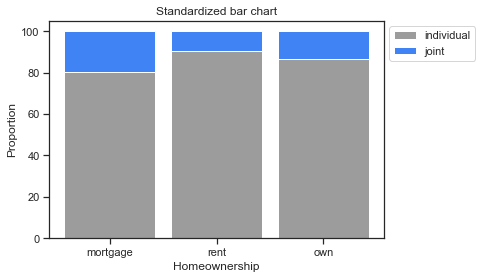

In [3]:
# Data
joint = df.homeownership[df.application_type=="joint"].value_counts() 
individual = df.homeownership[df.application_type=="individual"].value_counts() 
labels = list(df['homeownership'].value_counts().index)
r = [0,1,2]

# From raw value to percentage
totals = [i+j for i,j in zip(joint, individual)]
joint_bar = [i / j * 100 for i,j in zip(joint, totals)]
individual_bar = [i / j * 100 for i,j in zip(individual, totals)]

# plot
barWidth = 0.85
plt.bar(r, individual_bar, color=grey, edgecolor='white', width=barWidth, label="individual")
plt.bar(r, joint_bar, bottom=individual_bar, color=blue, edgecolor='white', width=barWidth, label="joint")

# Custom axis
plt.xticks(r, labels)
plt.xlabel("Homeownership")
plt.ylabel("Proportion")

# Add a legend and title
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title("Standardized bar chart");